In [76]:
import matplotlib
from matplotlib.pylab import *
%matplotlib inline

matplotlib.rcParams['font.size'] = 16

In [33]:
import json
repos = []
with open('data/repos_with_annotation_infos.json') as input_file:
    for line in input_file:
        repos.append(json.loads(line))

In [40]:
repos = repos[1:]

In [41]:
import math
N = math.ceil(sqrt(len(repos)))

In [87]:
import numpy as np
all_annotations = np.zeros((N, N)) + 1
inline_annotations = np.zeros((N, N)) + 1
comment_annotations = np.zeros((N, N)) + 1
pyi_annotations = np.zeros((N, N)) + 1
for i, repo in enumerate(repos):
    all_annotations[i%N,i//N] = 1 + sum([file['annotation_hints']+file['return_hints']+file['type_comments']+file['typing_imports']+(1 if file['pyi_file'] else 0) for file in repo['files']])
    inline_annotations[i%N,i//N] = 1 + sum([file['annotation_hints']+file['return_hints'] for file in repo['files']])
    comment_annotations[i%N,i//N] = 1 + sum([file['type_comments'] for file in repo['files']])
    pyi_annotations[i%N,i//N] = 1 + sum([(1 if file['pyi_file'] else 0) for file in repo['files']])

In [91]:
print("All annotations:",np.sum(all_annotations > 1))
print("Inline annotations:",np.sum(inline_annotations > 1))
print("Comment annotations:",np.sum(comment_annotations > 1))
print("Pyi annotations:",np.sum(pyi_annotations > 1))

All annotations: 103
Inline annotations: 51
Comment annotations: 64
Pyi annotations: 7


In [93]:
print("All annotations:",np.sum(all_annotations > 11))
print("Inline annotations:",np.sum(inline_annotations > 11))
print("Comment annotations:",np.sum(comment_annotations > 11))
print("Pyi annotations:",np.sum(pyi_annotations > 11))

All annotations: 53
Inline annotations: 33
Comment annotations: 28
Pyi annotations: 1


In [94]:
print("All annotations:",np.sum(all_annotations > 21))
print("Inline annotations:",np.sum(inline_annotations > 21))
print("Comment annotations:",np.sum(comment_annotations > 21))
print("Pyi annotations:",np.sum(pyi_annotations > 21))

All annotations: 46
Inline annotations: 30
Comment annotations: 22
Pyi annotations: 1


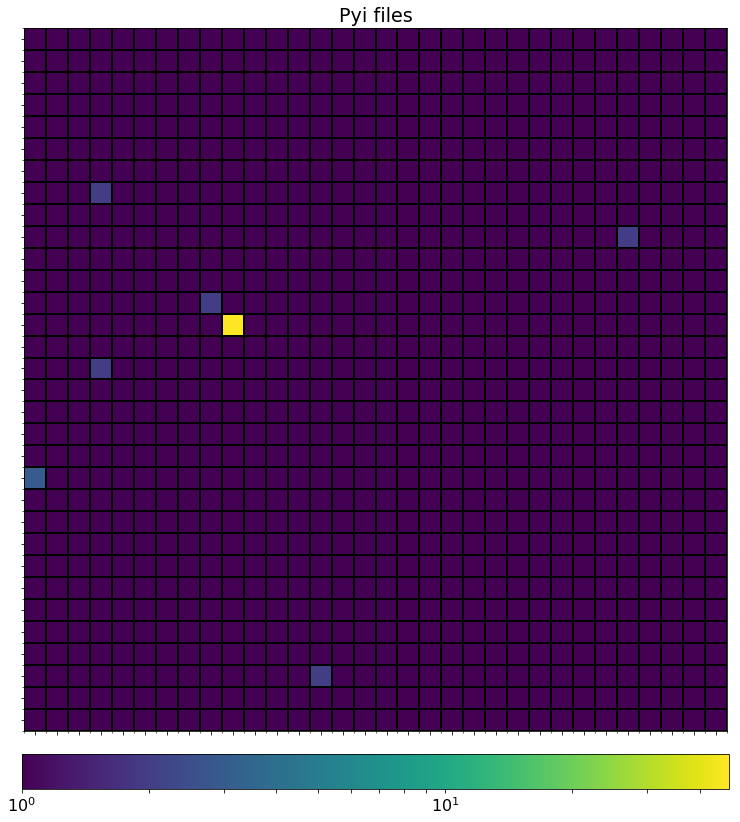

In [88]:
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatterMathtext

figure(figsize=(14,14))
ax = gca()
imshow(pyi_annotations, interpolation=None, aspect='equal', norm=LogNorm())

# Major ticks
ax.set_xticks(np.arange(0, N, 1));
ax.set_yticks(np.arange(0, N, 1));

# Labels for major ticks
ax.set_xticklabels([]);
ax.set_yticklabels([]);

# Minor ticks
ax.set_xticks(np.arange(-.5, N, 1), minor=True);
ax.set_yticks(np.arange(-.5, N, 1), minor=True);

ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

colorbar(orientation='horizontal',format=LogFormatterMathtext(), fraction=0.0465, pad=0.03)
title("Pyi files")